# Image Classification with Logistic Regression using PyTroch

Here we use MNIST dataset to explore the data and most. 

In [1]:
# import the libararies
import torch as tr
import torchvision as tv
from torchvision.datasets import MNIST as MT
import torchvision.transforms as tf
from torch.utils.data import random_split
import matplotlib.pyplot as plt
%matplotlib inline

### Download the training dataset

In [2]:
# training dataset download
train_data = MT(root='data/', download=True)

In [3]:
len(train_data) # find the leanth of the dataset

60000

In [4]:
test_data = MT(root='data/', train=False)

In [5]:
len(test_data)

10000

### Let's show the image from the dataset
For this, we will use matplotlib for showcase the images.

Label: 9


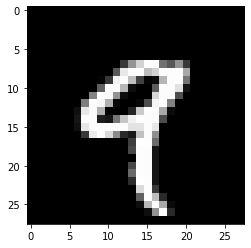

In [6]:
image, label = train_data[4]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [7]:
train_data[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x1DAA1275610>, 5)

Label: 3


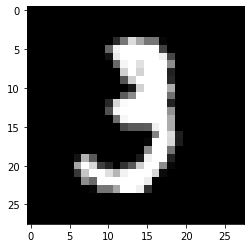

In [8]:
image, label = train_data[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [9]:
train_ds = MT(root='data/',
             train=True,
             transform=tf.ToTensor()
             )
test_ds = MT(root='data/',
            train=False,
            transform=tf.ToTensor()
            )

In [10]:
img_tensor, label= train_ds[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


### let's look at some image sample values inside the tensor

In [11]:
print(img_tensor[:, 10:15, 10:15])
print(tr.max(img_tensor), tr.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


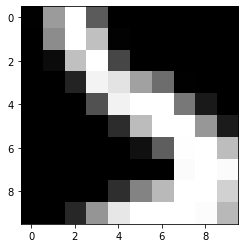

In [12]:
# plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0, 10:20, 10:20], cmap='gray')

### Training and Validation Datasets
we will randomly pick the images from the dataset, for this reason we import the random_split method from PyTorch

In [13]:
train_dataset, val_dataset = random_split(train_ds, [50000, 10000])

In [14]:
# find the lenth of the dataset
len(train_dataset), len(val_dataset)

(50000, 10000)

### DataLoader

In [15]:
# import dataloader library
from torch.utils.data.dataloader import DataLoader

In [16]:
train_loader = DataLoader(train_dataset, batch_size= 100, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=100, shuffle=True)

In [17]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# logistic regression model
model = nn.Linear(input_size, num_classes)

In [18]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0124, -0.0347, -0.0059,  ...,  0.0012, -0.0036,  0.0219],
        [ 0.0279,  0.0133,  0.0045,  ...,  0.0143,  0.0007, -0.0002],
        [ 0.0183,  0.0057,  0.0292,  ..., -0.0208,  0.0319,  0.0128],
        ...,
        [ 0.0266,  0.0333, -0.0209,  ..., -0.0213,  0.0202, -0.0213],
        [-0.0356,  0.0341, -0.0274,  ..., -0.0080,  0.0051, -0.0249],
        [-0.0215, -0.0295,  0.0244,  ..., -0.0115,  0.0162, -0.0317]],
       requires_grad=True)

In [19]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0128,  0.0268, -0.0333, -0.0046, -0.0118, -0.0265, -0.0223, -0.0095,
         0.0214, -0.0075], requires_grad=True)

In [20]:

#### Now we will take first batch of 100 images from our dataset and pass the into our model
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    #outputs = model(images)
    break

tensor([2, 7, 8, 9, 4, 9, 7, 6, 7, 8, 6, 1, 9, 3, 1, 0, 6, 7, 1, 2, 8, 9, 5, 3,
        2, 7, 2, 5, 6, 5, 5, 9, 9, 3, 0, 2, 2, 9, 3, 1, 0, 5, 4, 1, 6, 9, 6, 2,
        1, 1, 6, 1, 6, 3, 3, 1, 0, 9, 7, 0, 1, 5, 1, 7, 5, 3, 7, 8, 4, 2, 3, 0,
        7, 2, 6, 0, 7, 3, 2, 7, 6, 2, 7, 9, 5, 2, 8, 4, 2, 3, 1, 0, 0, 6, 0, 8,
        3, 6, 4, 6])
torch.Size([100, 1, 28, 28])


In [21]:
images.shape

torch.Size([100, 1, 28, 28])

In [22]:
images.reshape(100, 784).shape

torch.Size([100, 784])

This error leads us for mismatch for image vector. our image are of the shape of 28x28 but we need them to be bector fo size 784 i.e. we need to flatten them out. We'll use  the ```.reshape``` method of a tensor, which will allow us to efficiently 'view' each image as a flat vector. 
Now we need to costom ```nn.Module``` class from pyTroch

In [23]:
class mnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = mnistModel()

In [24]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [25]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0009,  0.0317,  0.0067,  ...,  0.0065, -0.0307,  0.0146],
         [ 0.0278,  0.0114,  0.0292,  ..., -0.0004, -0.0260, -0.0228],
         [-0.0095, -0.0188,  0.0108,  ...,  0.0349,  0.0122, -0.0347],
         ...,
         [ 0.0294, -0.0222, -0.0047,  ...,  0.0066, -0.0100, -0.0241],
         [ 0.0256, -0.0013, -0.0194,  ..., -0.0003, -0.0224, -0.0030],
         [ 0.0224,  0.0156,  0.0289,  ..., -0.0094, -0.0048,  0.0020]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0235,  0.0346,  0.0128, -0.0263,  0.0223,  0.0035, -0.0094,  0.0223,
          0.0305, -0.0206], requires_grad=True)]

Our new custom model can be used in the exact same way as before. Let's see if it works:

In [26]:
for images, labels in train_loader:
    outputs = model(images)
    break
print('Outputs.shape: ', outputs.shape)
print("sample outputs: \n", outputs[:2].data)

Outputs.shape:  torch.Size([100, 10])
sample outputs: 
 tensor([[-0.5142, -0.3682, -0.0162,  0.0483,  0.3800,  0.1586,  0.0014,  0.0470,
         -0.0761, -0.2385],
        [-0.0295, -0.1881,  0.2819, -0.2787,  0.2971,  0.1940,  0.0629,  0.1465,
         -0.0934, -0.0548]])


Each output row's elements must lie between 0 to 1 and add up to 1, which is not the case.
To convert the output rows into probabilities, we use the softmax function, which has the following formula:

In [27]:
# import the library
import torch.nn.functional as F

In [28]:
outputs[:3]

tensor([[-0.5142, -0.3682, -0.0162,  0.0483,  0.3800,  0.1586,  0.0014,  0.0470,
         -0.0761, -0.2385],
        [-0.0295, -0.1881,  0.2819, -0.2787,  0.2971,  0.1940,  0.0629,  0.1465,
         -0.0934, -0.0548],
        [-0.0780, -0.1339,  0.0502, -0.1732,  0.2498,  0.2555,  0.0472,  0.0739,
          0.0606, -0.0891]], grad_fn=<SliceBackward0>)

In [29]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", tr.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0615, 0.0712, 0.1012, 0.1080, 0.1504, 0.1205, 0.1030, 0.1078, 0.0953,
         0.0810],
        [0.0923, 0.0787, 0.1260, 0.0719, 0.1279, 0.1154, 0.1012, 0.1100, 0.0866,
         0.0900]])
Sum:  0.9999999403953552


In [30]:
max_probs, preds = tr.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 4, 5, 4, 4, 5, 4, 8, 4, 4, 4, 7, 4, 6, 6, 4, 4, 8, 5, 4, 5, 4, 8, 4,
        4, 7, 4, 4, 7, 4, 4, 7, 4, 4, 4, 8, 4, 4, 4, 6, 4, 8, 6, 4, 7, 4, 7, 4,
        4, 4, 4, 8, 6, 4, 4, 4, 7, 7, 4, 5, 4, 4, 4, 4, 5, 8, 4, 6, 4, 2, 4, 5,
        5, 4, 4, 4, 4, 7, 4, 2, 4, 7, 1, 7, 8, 7, 4, 1, 7, 4, 6, 5, 6, 4, 7, 4,
        4, 4, 2, 5])
tensor([0.1504, 0.1279, 0.1245, 0.1203, 0.1815, 0.1466, 0.1214, 0.1196, 0.1253,
        0.1648, 0.1636, 0.1180, 0.1222, 0.1261, 0.1183, 0.1398, 0.1375, 0.1235,
        0.1290, 0.1804, 0.1370, 0.1581, 0.1642, 0.1372, 0.1623, 0.1217, 0.1221,
        0.1544, 0.1194, 0.1342, 0.1865, 0.1435, 0.1581, 0.1280, 0.1620, 0.1123,
        0.1708, 0.1106, 0.1595, 0.1125, 0.1341, 0.1296, 0.1299, 0.1505, 0.1129,
        0.1290, 0.1374, 0.1323, 0.1344, 0.1806, 0.1252, 0.1300, 0.1401, 0.1534,
        0.1532, 0.1790, 0.1209, 0.1184, 0.1232, 0.1306, 0.1316, 0.1527, 0.1264,
        0.1287, 0.1366, 0.1337, 0.1440, 0.1232, 0.1364, 0.1285, 0.1807, 0.1363,
        0.1352, 0.1

In [31]:
labels

tensor([0, 4, 7, 0, 0, 9, 6, 4, 9, 3, 5, 4, 3, 7, 8, 0, 0, 6, 9, 0, 9, 0, 0, 5,
        8, 9, 4, 8, 5, 3, 2, 5, 2, 4, 0, 1, 6, 1, 2, 1, 3, 5, 9, 4, 9, 2, 9, 5,
        9, 6, 3, 6, 7, 3, 3, 8, 7, 9, 9, 3, 0, 2, 2, 8, 7, 6, 0, 7, 6, 7, 8, 9,
        1, 1, 0, 6, 3, 4, 1, 7, 0, 3, 3, 5, 6, 3, 8, 3, 7, 5, 7, 7, 9, 2, 4, 5,
        1, 5, 4, 8])

## Evaluation Metric and Loss function

In [32]:
def accuracy(outputs, labels):
    _, preds = tr.max(outputs, dim=1)
    return tr.tensor(tr.sum(preds == labels).item() / len(preds))

In [33]:
tr.sum(preds == labels)

tensor(6)

In [34]:
outputs[:2]

tensor([[-0.5142, -0.3682, -0.0162,  0.0483,  0.3800,  0.1586,  0.0014,  0.0470,
         -0.0761, -0.2385],
        [-0.0295, -0.1881,  0.2819, -0.2787,  0.2971,  0.1940,  0.0629,  0.1465,
         -0.0934, -0.0548]], grad_fn=<SliceBackward0>)

In [35]:
accuracy(outputs, labels)

tensor(0.0600)

In [36]:
# find the loss function
# here we use cross-enropy as loss function

loss_fn = F.cross_entropy

#loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3906, grad_fn=<NllLossBackward0>)


## Optimizer
Here we will use the ```optim.SDG``` optimizer to update the weights and bias during training

In [37]:
lr = 0.001
opt = tr.optim.SGD(model.parameters(), lr)

### Training the model

In [38]:
def fit(epochs, lr, model, train_loader, val_loader, opt=tr.optim.SGD):
    optimizer = opt(model.parameters(), lr)
    history = []
    
    for epoch in range(epochs):
        
        # training phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        # validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [39]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [40]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = tr.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = tr.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch+1, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [41]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.294098138809204, 'val_acc': 0.08290000259876251}

In [42]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [1], val_loss: 1.8456, val_acc: 0.6672
Epoch [2], val_loss: 1.5468, val_acc: 0.7320
Epoch [3], val_loss: 1.3398, val_acc: 0.7621
Epoch [4], val_loss: 1.1924, val_acc: 0.7840
Epoch [5], val_loss: 1.0837, val_acc: 0.8017


In [43]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [1], val_loss: 1.0008, val_acc: 0.8118
Epoch [2], val_loss: 0.9357, val_acc: 0.8190
Epoch [3], val_loss: 0.8832, val_acc: 0.8260
Epoch [4], val_loss: 0.8400, val_acc: 0.8303
Epoch [5], val_loss: 0.8037, val_acc: 0.8343


In [44]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [1], val_loss: 0.7728, val_acc: 0.8385
Epoch [2], val_loss: 0.7462, val_acc: 0.8416
Epoch [3], val_loss: 0.7230, val_acc: 0.8445
Epoch [4], val_loss: 0.7025, val_acc: 0.8470
Epoch [5], val_loss: 0.6843, val_acc: 0.8493


In [ ]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [1], val_loss: 0.6680, val_acc: 0.8504


In [ ]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('acc vs no of epoch')

### **Apply on test dataset**

In [ ]:
img, label = test_ds[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = tr.max(yb, dim=1)
    return preds[0].item()

In [ ]:
img, label = test_ds[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label,' , predicted:', predict_image(img, model))

In [ ]:
img, label = test_ds[167]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label,' , predicted:', predict_image(img, model))

In [ ]:
img, label = test_ds[227]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label,' , predicted:', predict_image(img, model))

In [ ]:
img, label = test_ds[560]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label,' , predicted:', predict_image(img, model))

In [ ]:
img, label = test_ds[1982]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label,' , predicted:', predict_image(img, model))

In [ ]:
img, label = test_ds[2678]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label,' , predicted:', predict_image(img, model))

In [ ]:
test_loader = DataLoader(test_ds, batch_size=256)
result = evaluate(model, test_loader)
result

### Save and loading the model

In [ ]:
tr.save(model.state_dict(), 'mnist-logistic-regression.pth')

In [ ]:
model.state_dict()

In [ ]:
model11 = MnistModel()

In [ ]:
model11.state_dict()

In [ ]:
evaluate(model11, test_loader)

In [ ]:
model11.load_state_dict(tr.load('mnist-logistic-regression.pth'))
model11.state_dict()

In [ ]:
test_loader = DataLoader(test_ds, batch_size=256)
result = evaluate(model11, test_loader)
result